## DARWIN SiPM simulation## 

In [1]:
#
# import the SiPM classes
#
from SiPM import *
# for plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Define general geometry parameters ###

In [2]:
# z position of the in-plane SiPMs
z_plane = 10
# radius of the cyinder for SiPMs at the side
r_cylinder = 22
# radius of a SiPM - I assume circular SiPMs with a radius to make the area correspond to a 3x3mm2 square.
r_sipm = 1.6925
# make an instant of the geometry class
geo = GeoParameters(z_plane=z_plane, r_cylinder=r_cylinder, r_sipm=r_sipm)

### Define the geometry of the silicon PMs ###

Add the SiPMs to the geometry

In [3]:
inch = 25.4 # mm

# generate a square array of SiPMs
for x in np.arange(0,3*inch,25):
    for y in np.arange(0,3*inch,25):
        sipm = SiPM(type="plane",position=[x,y,z_plane],qeff=0.25)
        geo.add_sipm(sipm)

### Simulate the SiPM acceptance ###

* uv_position is the position where the UV photons are generated
* n_mc is the number of MC photons

In [4]:
sim = Simulator(geo=geo,uv_position=[25.4,25.4,0],n_mc=1000000)
sim.generate_events()

generated  0  events
generated  100000  events
generated  200000  events
generated  300000  events
generated  400000  events
generated  500000  events
generated  600000  events
generated  700000  events
generated  800000  events
generated  900000  events
Number of SiPMs =  16  Generated hits from x= [25.4, 25.4, 0]
 0  (x,y,z) = ( 0.0,  0.0, 10.0) p(hit) = 0.00003  qe = 0.250
 1  (x,y,z) = ( 0.0, 25.0, 10.0) p(hit) = 0.00009  qe = 0.250
 2  (x,y,z) = ( 0.0, 50.0, 10.0) p(hit) = 0.00003  qe = 0.250
 3  (x,y,z) = ( 0.0, 75.0, 10.0) p(hit) = 0.00001  qe = 0.250
 4  (x,y,z) = (25.0,  0.0, 10.0) p(hit) = 0.00009  qe = 0.250
 5  (x,y,z) = (25.0, 25.0, 10.0) p(hit) = 0.00174  qe = 0.250
 6  (x,y,z) = (25.0, 50.0, 10.0) p(hit) = 0.00010  qe = 0.250
 7  (x,y,z) = (25.0, 75.0, 10.0) p(hit) = 0.00002  qe = 0.250
 8  (x,y,z) = (50.0,  0.0, 10.0) p(hit) = 0.00004  qe = 0.250
 9  (x,y,z) = (50.0, 25.0, 10.0) p(hit) = 0.00009  qe = 0.250
10  (x,y,z) = (50.0, 50.0, 10.0) p(hit) = 0.00003  qe = 0.250
1

### Emulate events and reconstruct the position ###

* n_event = number of events to emulate
* n_uv = number of UV photons assumed for the S2 signal

generated  0  events
Reconstruction::event_display() 


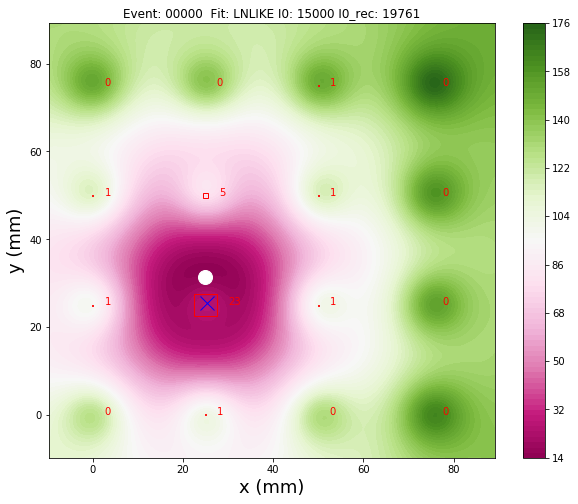

In [ ]:
rec = Reconstruction(geo=geo,sim=sim)
df = rec.emulate_events(n_uv=15000,n_event=1000,method="LNLIKE",plot=True,nbins=100,range=((-10,90),(-10,90)))
#df = rec.emulate_events(n_uv=15000,n_event=1000,method="LNLIKE",plot=False)

### Plots from here ...... ###

1D distribution of reconstructed x and y position

In [ ]:
a = rec.plot(type="res",bins=100,range=(15,35))

2D distribution of y as a function of x

In [ ]:
inch = 25.4
ax = rec.plot(type="xy",range=((-10,3*inch+10),(-10,3*inch+10)))
# add outline of a single 3" PMT
c1 = plt.Circle(radius=3*inch/2,xy=(3*inch/2,3*inch/2),fill=False,color='white')
ax.add_artist(c1)

Distribution of reconstructed UV intensity

In [ ]:
rec.plot(type="intensity",range=(0,40000))